# Find and display pointing nodes using lstmcpipe

In [1]:
import lstmcpipe
print(f"lstmcpipe v{lstmcpipe.__version__}")

lstmcpipe v0.10.0


In [2]:
import os
import matplotlib.pyplot as plt
from lstmcpipe.config import paths_config

## Creating a PathConfig

In lstmcpipe, a PathConfig handles the paths to the different data levels, models, etc... that will then help orchestrate all the jobs and their dependencies.

We need to create one to load the existing poitings. To do so, you need to run the following on the cluster at La Palma.

You will find different PathConfig in the `paths_config` module depending on what you want to do.
Here we'll use the `PathConfigAllSkyFull` one, that can orchestrate a complete analysis for the AllSky production.

In [3]:
paths_config.PathConfigAllSkyFull?

Init signature: paths_config.PathConfigAllSkyFull(prod_id, dec_list)
Docstring:      Base class to generate a Path configuration for a production
Init docstring:
Does training and testing for a list of declinations

Parameters
----------
prod_id: str
dec_list: [str]
File:           /fefs/aswg/workspace/thomas.vuillaume/software/miniconda3/envs/lstmcpipe/lib/python3.7/site-packages/lstmcpipe/config/paths_config.py
Type:           type
Subclasses:     PathConfigAllSkyFullDL1ab


NB: The `dec_list` is used for the training nodes only. There will be as many models trained as declination provided.

The available declinations can be found here:

In [4]:
dec_list = os.listdir("/fefs/aswg/data/mc/DL0/LSTProd2/TrainingDataset/Protons")
dec_list

['dec_6166',
 'dec_min_2924',
 'dec_931',
 'dec_3476',
 'dec_6676',
 'dec_min_413',
 'dec_2276',
 'dec_4822',
 'dec_min_1802']

In [5]:
config = paths_config.PathConfigAllSkyFull('all_decs', dec_list)

## Training configs 

There is one `PathConfigAllSkyTraining` per pointing:

In [6]:
config.train_configs

{'dec_6166': <lstmcpipe.config.paths_config.PathConfigAllSkyTraining at 0x7fecc8da1810>,
 'dec_min_2924': <lstmcpipe.config.paths_config.PathConfigAllSkyTraining at 0x7fecc8da14d0>,
 'dec_931': <lstmcpipe.config.paths_config.PathConfigAllSkyTraining at 0x7fecc8da1750>,
 'dec_3476': <lstmcpipe.config.paths_config.PathConfigAllSkyTraining at 0x7fecc8da1450>,
 'dec_6676': <lstmcpipe.config.paths_config.PathConfigAllSkyTraining at 0x7fecc8da1690>,
 'dec_min_413': <lstmcpipe.config.paths_config.PathConfigAllSkyTraining at 0x7fecc8da1390>,
 'dec_2276': <lstmcpipe.config.paths_config.PathConfigAllSkyTraining at 0x7fecc8da15d0>,
 'dec_4822': <lstmcpipe.config.paths_config.PathConfigAllSkyTraining at 0x7fecc8da1310>,
 'dec_min_1802': <lstmcpipe.config.paths_config.PathConfigAllSkyTraining at 0x7fecc8da1910>}

For each of them, one can access the config, and in particular the pointings

In [7]:
config.train_configs['dec_2276'].pointings

alt,az,dirname_GammaDiffuse,dirname_Protons
deg,deg,,
float64,float64,str37,str29
23.554000000000002,75.983,node_corsika_theta_66.446_az_75.983_,node_theta_66.446_az_75.983_
23.554000000000002,284.017,node_corsika_theta_66.446_az_284.017_,node_theta_66.446_az_284.017_
30.658,79.18,node_corsika_theta_59.342_az_79.180_,node_theta_59.342_az_79.180_
30.658,280.82,node_corsika_theta_59.342_az_280.820_,node_theta_59.342_az_280.820_
37.838,82.384,node_corsika_theta_52.162_az_82.384_,node_theta_52.162_az_82.384_
37.838,277.616,node_corsika_theta_52.162_az_277.616_,node_theta_52.162_az_277.616_
45.073,85.716,node_corsika_theta_44.927_az_85.716_,node_theta_44.927_az_85.716_
45.073,274.284,node_corsika_theta_44.927_az_274.284_,node_theta_44.927_az_274.284_


One can display them:

<PolarAxesSubplot:xlabel='Azimuth'>

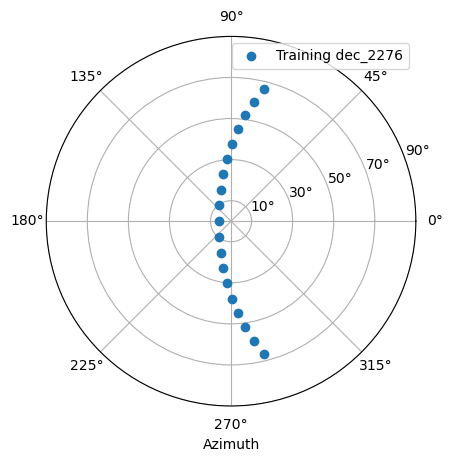

In [8]:
config.train_configs['dec_2276'].plot_pointings()

## Test config

One can do the same for the testing nodes.

There is also one config per test, since each trained model will be applied to the test nodes to produce the dedicated IRFs

In [9]:
config.test_configs

{'dec_6166': <lstmcpipe.config.paths_config.PathConfigAllSkyTesting at 0x7fecc8da1510>,
 'dec_min_2924': <lstmcpipe.config.paths_config.PathConfigAllSkyTesting at 0x7fecc8da12d0>,
 'dec_931': <lstmcpipe.config.paths_config.PathConfigAllSkyTesting at 0x7fecc8da1950>,
 'dec_3476': <lstmcpipe.config.paths_config.PathConfigAllSkyTesting at 0x7fecc8da1990>,
 'dec_6676': <lstmcpipe.config.paths_config.PathConfigAllSkyTesting at 0x7fecc8da19d0>,
 'dec_min_413': <lstmcpipe.config.paths_config.PathConfigAllSkyTesting at 0x7fecc8da1a10>,
 'dec_2276': <lstmcpipe.config.paths_config.PathConfigAllSkyTesting at 0x7fecc8da1a50>,
 'dec_4822': <lstmcpipe.config.paths_config.PathConfigAllSkyTesting at 0x7fecc8da1a90>,
 'dec_min_1802': <lstmcpipe.config.paths_config.PathConfigAllSkyTesting at 0x7fecc8da1ad0>}

In [10]:
config.test_configs['dec_2276'].pointings

alt,az,dirname
deg,deg,
float64,float64,str29
16.858000000000004,331.979,node_theta_73.142_az_331.979_
19.268,330.659,node_theta_70.732_az_330.659_
46.803,87.604,node_theta_43.197_az_87.604_
21.932000000000002,283.075,node_theta_68.068_az_283.075_
37.626,216.698,node_theta_52.374_az_216.698_
29.472,175.158,node_theta_60.528_az_175.158_
29.340000000000003,327.483,node_theta_60.66_az_327.483_
37.626,197.973,node_theta_52.374_az_197.973_


<PolarAxesSubplot:xlabel='Azimuth'>

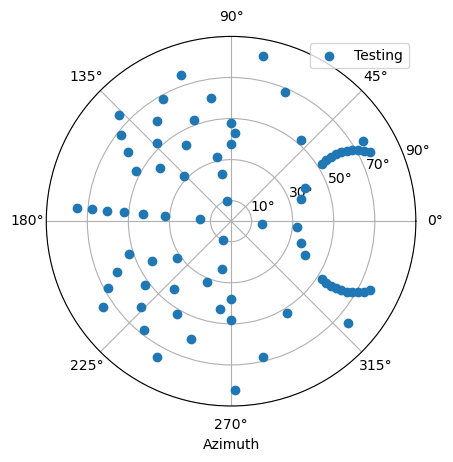

In [11]:
config.test_configs['dec_2276'].plot_pointings()

## Put them all together

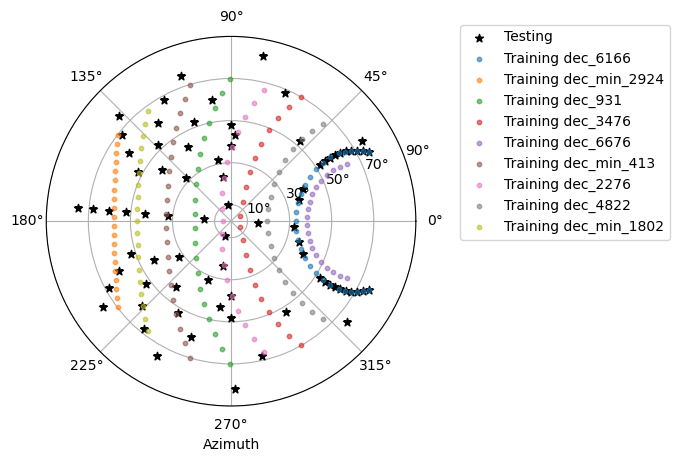

In [12]:
ax = config.test_configs['dec_2276'].plot_pointings(color='black', marker='*')

for dec, cfg in config.train_configs.items():
    ax = cfg.plot_pointings(ax=ax, alpha=0.6, s=10)
ax.legend(bbox_to_anchor=(1.1, 1.05))

Or in 3D

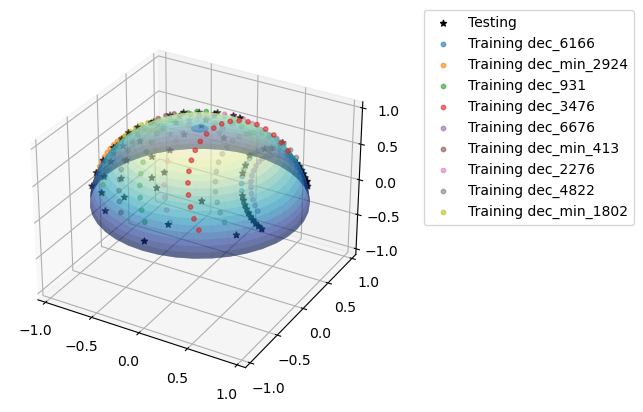

In [13]:
ax = config.test_configs['dec_2276'].plot_pointings(projection='3d', color='black', marker='*')

for dec, cfg in config.train_configs.items():
    ax = cfg.plot_pointings(ax=ax, projection='3d', alpha=0.6, s=10)
ax.legend(bbox_to_anchor=(1.1, 1.05))